In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering for Continuous Variables 
In this notebook we will cover scaling, transformations, and interactive features. This notebook is the This is a companion workbook for the 365 Data Science course on ML Process. The in-depth explanantions theories and pros/cons for each of these techniques can be found there. 

## Feature Scaling
Feature scaling is important for we are using models with a distance metric. If our features are of different scales, they can be overcompensated for in the models. 
- Absolute Max Scaling
- MinMax Scaling
- Z-Score Normalization (Standard Scaler)
- Robust Scaler 
## Transformations 
- Logarithmic 
- Square Root 
- Exponential
- Box-Cox
## Interaction Features
- Arithmetic Interaction
- Binning
- Creative Features 



In [119]:
df = pd.read_csv('vehicles.csv')

#let's add a column for car age that will help us later on: 
df['car_age'] = df['year'].max() - df['year']

In [63]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'car_age'],
      dtype='object')

In [64]:
df.describe()
# Columns we may want to normalize 
# Price, Year, Odometer

,id,price,year,odometer,county,lat,long,car_age
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000,425675.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599,10.764809
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462,9.452120
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728,0.000000
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847,5.000000
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600,9.000000
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039,14.000000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502,122.000000


In [65]:
#let's just use a few features to create an example model and remove Nulls. Learn mnore about different imputation techniques in this other companion notebook. 
#pd.get_dummie() creates dummy variables for the categorical features (see this notebook for more on that)
df_example = pd.get_dummies(df.loc[:,['price','car_age','odometer','manufacturer','condition']].dropna())


In [97]:
from sklearn.model_selection import train_test_split

X = df_example.drop('price',axis =1 )
y = df_example[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

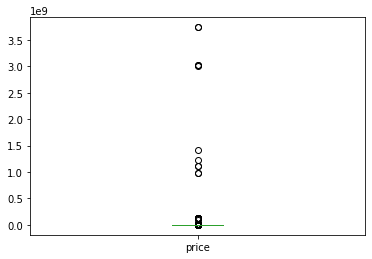

In [8]:
df.price.plot.box()

<AxesSubplot:>

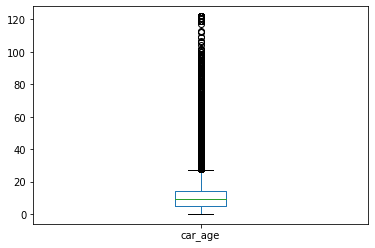

In [9]:
#df.price.plot.box()
df.car_age.plot.box()
#df.odometer.plot.box()

<AxesSubplot:>

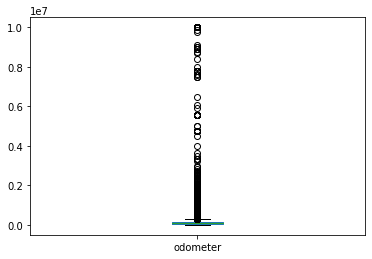

In [10]:
df.odometer.plot.box()

# Feature Scaling
Feature scaling is important for we are using models with a distance metric. If our features are of different scales, they can be overcompensated for in the models. 
- Absolute Max Scaling
- MinMax Scaling
- Z-Score Normalization (Standard Scaler)
- Robust Scaler 


## Absolute Maximum Scaling
Absolute maximum scaling will have you take the maximum value within the data and then divide the raw data by this absolute maximum value.

For absolute max scaling, this works best if our data doesn't have massive outliers. In this case, we would likely want to remove outliers from price and odometer. This also keeps the same distribution of the data. For absolute maximum scaling, let's do this on the year data for the cars. 

In [11]:
from sklearn.preprocessing import MaxAbsScaler

#Scale data 
df_am = MaxAbsScaler().fit_transform(X_train)

#convert to dataframe to see table
df_am = pd.DataFrame(df_am, columns = X_train.columns)

#obvious problems with outliers regarding price & odometer 

# Min Max Scaling
Another simple form of scaling is called min max. Min Max scaling will scale all our data points between 0 and 1. We’d use the following formula to scale our data, where we subtract the min from the raw data and then divide it by the max minus the min. 

Again, this approach is not robust to outliers.

In [13]:
from sklearn.preprocessing import MinMaxScaler
df_min_max = MinMaxScaler().fit_transform(X_train)
df_min_max = pd.DataFrame(df_min_max, columns = X_train.columns)

# Z Score Normalization (Standard Scaling)

Another approach is standardization which transforms the data into the z-score, where the mean is zero and the standard deviation is 1.

This approach is more robust to outliers, but still can have issues if outliers cause massive changes to standard deviation. However, this does assume a normal distribution which is inaccurate for some of our data (Year).

In [14]:
from sklearn.preprocessing import StandardScaler
df_std = X_train.copy()
#only scale numeric varaibles in this case rather than the dummy variables for categories 
df_std.loc[:,['car_age','odometer']] = StandardScaler().fit_transform(df_std.loc[:, ['car_age','odometer']])
df_std

,car_age,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
200340,-0.317319,-0.003322,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
110895,-0.528033,-0.277807,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
329804,-0.633390,0.067063,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
367376,-0.422676,-0.371896,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
193480,1.789823,0.146898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209252,-0.844104,-0.307973,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
183285,-0.844104,-0.382076,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
232490,-0.633390,-0.169595,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
260830,0.104110,0.340697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Robust Scaler
With Robust Scaler, we’re subtracting the median and then scaling the column by the IQR.

This is the approach most robust to outliers that we will cover.

In [15]:
from sklearn.preprocessing import RobustScaler
df_rob = X_train.copy()
#only scale numeric varaibles in this case rather than the dummy variables for categories 
df_rob.loc[:,['car_age','odometer']] = RobustScaler().fit_transform(df_rob.loc[:, ['car_age','odometer']])
df_rob

,car_age,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
200340,-0.111111,0.114860,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
110895,-0.333333,-0.425479,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
329804,-0.444444,0.253417,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
367376,-0.222222,-0.610698,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
193480,2.111111,0.410576,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209252,-0.666667,-0.484862,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
183285,-0.666667,-0.630737,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
232490,-0.444444,-0.212457,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
260830,0.333333,0.792080,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
#let's do a simple exmaple where we compare results with the different features scaling techniques. We will remove the categorical data for this. 

#the model we will be using is K Nearest Neighbors which can use euclidean distance. 

#we will use year and odometer to predict price 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

#noscaling 
neigh_am = KNeighborsRegressor(n_neighbors=3)
neigh_am.fit(X_train.loc[:,['car_age','odometer']], y_train)
pred = neigh_am.predict(X_test.loc[:,['car_age','odometer']])

#absolute max 
neigh_am = KNeighborsRegressor(n_neighbors=3)
neigh_am.fit(df_am.loc[:,['car_age','odometer']], y_train)
am_pred = neigh_am.predict(X_test.loc[:,['car_age','odometer']])

#min max (should get same results)
neigh_mm = KNeighborsRegressor(n_neighbors=3)
neigh_mm.fit(df_min_max.loc[:,['car_age','odometer']], y_train)
mm_pred = neigh_mm.predict(X_test.loc[:,['car_age','odometer']])

#standard (z score)
neigh_std = KNeighborsRegressor(n_neighbors=3)
neigh_std.fit(df_std.loc[:,['car_age','odometer']], y_train)
std_pred = neigh_std.predict(X_test.loc[:,['car_age','odometer']])

#robust scaler 
neigh_rob = KNeighborsRegressor(n_neighbors=3)
neigh_rob.fit(df_rob.loc[:,['car_age','odometer']], y_train)
rob_pred = neigh_rob.predict(X_test.loc[:,['car_age','odometer']])



In [17]:
print('No Scaling: %.3f' % mean_absolute_error(y_test,pred))
print('Abosolute Max Score: %.3f' % mean_absolute_error(y_test,am_pred))
print('Min Max Score: %.3f' % mean_absolute_error(y_test,mm_pred))
print('Standard Scaling Score: %.3f' % mean_absolute_error(y_test,std_pred))
print('Robust Scaler Score: %.3f' % mean_absolute_error(y_test,rob_pred))


No Scaling: 65742.440
Abosolute Max Score: 17113.469
Min Max Score: 17113.469
Standard Scaling Score: 19995.350
Robust Scaler Score: 20225.628


# Transformations 
A data transformation is the process of using a math expression to change the structure of our data. As we mentioned before, some models need data to fit a specific type of distribution for them to produce optimal results. Unfortunately, the data we get in the real world, doesn’t always fit the distributions our models call for. 

Let's look at the shape of our data and if it has any outliers before we do our transforms

max odometer: 10000000.0
median odometer: 83190.0


<AxesSubplot:>

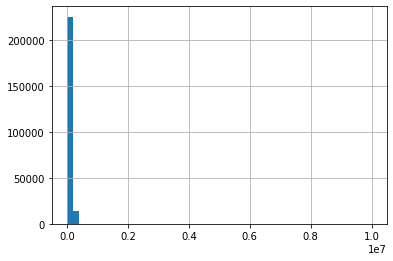

In [18]:
# visual of the distribution of the odometer without any outlier removal (see boxplots above)
#data is clearly impacted heavily by outliers 
print("max odometer: " + str(df_example['odometer'].max()))
print("median odometer: " + str(df_example['odometer'].median()))

df_example['odometer'].hist(bins=50)


<ipython-input-19-aa882cc544be>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_example[df['odometer']<df['odometer'].quantile(.99)]['odometer'].hist(bins=50)


<AxesSubplot:>

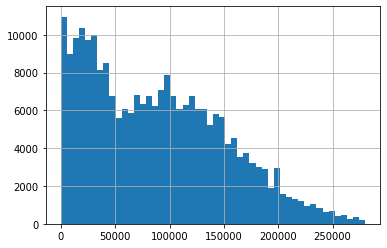

In [19]:
#shape of the data after very basic oultier removal (kept only data < 99th percentile)
#clear right skew in data 
df_example[df['odometer']<df['odometer'].quantile(.99)]['odometer'].hist(bins=50)

max price: 3736928711
median price: 14500.0


<AxesSubplot:>

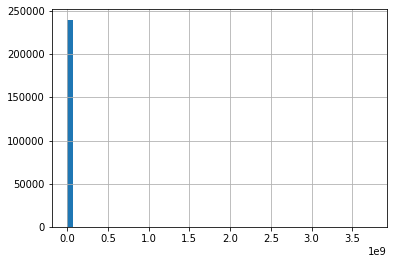

In [20]:
# visual of the distribution of the odometer without any outlier removal (see boxplots above)
#data is clearly impacted heavily by outliers 
print("max price: " + str(df_example['price'].max()))
print("median price: " + str(df_example['price'].median()))

df_example['price'].hist(bins=50)

<ipython-input-21-f192a9e7847f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_example[df['price']<df['price'].quantile(.99)]['price'].hist(bins=50)


<AxesSubplot:>

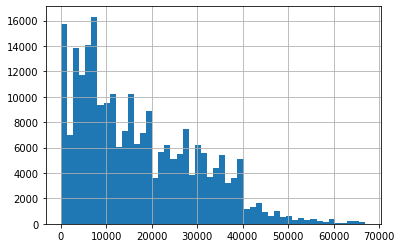

In [21]:
#shape of the data after very basic oultier removal (kept only data < 99th percentile)
#clear right skew in data 

df_example[df['price']<df['price'].quantile(.99)]['price'].hist(bins=50)

max age: 122.0
median age: 113.0


<AxesSubplot:>

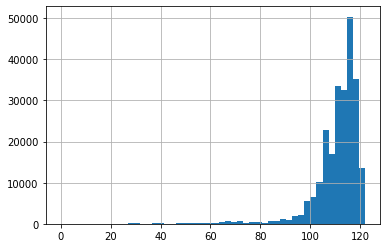

In [22]:
# Let's do some simple feature engineering to get how old the cars are

df_example['car_age'] = df_example['car_age'].max() - df_example['car_age']

print("max age: " + str(df_example['car_age'].max()))
print("median age: " + str(df_example['car_age'].median()))

df_example['car_age'].hist(bins=50)

# Logarithmic Transformation
A very popular, common type of transformation is the log transformation. Log transformations fall under the family of power transformations. Typically, we apply logarithmic transformations to our variables when our variables are heavily right skewed, driven by a few outliers. 

Let's see how these transformations impact some of our skewed data (Odometer & Price)

### Transforms we will cover
- Logarithmic 
- Exponential
- Square Root 
- Box-Cox

In [121]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x + 1)

transformer_log = FunctionTransformer(log_transform)
transformed_log = transformer_log.fit_transform(X_train)

In [122]:
transformer_logp = FunctionTransformer(log_transform)
transformed_logp = transformer_logp.fit_transform(y_train)

<AxesSubplot:>

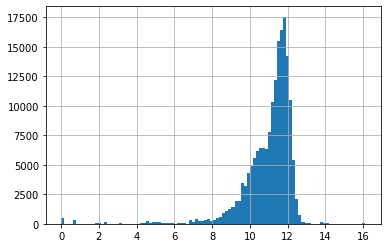

In [123]:
#as you can see, using log transform in this case actually creates some right skew. 
#It does however almost completely normalize the outliers that were present

transformed_log['odometer'].hist(bins = 100)

<AxesSubplot:>

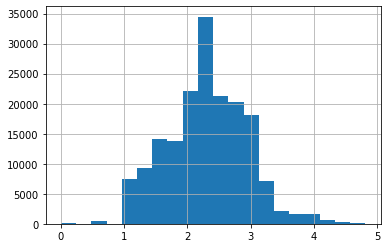

In [124]:
transformed_log['car_age'].hist(bins = 20)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

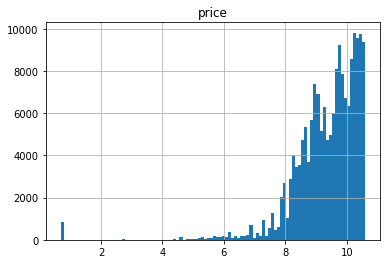

In [125]:
#as you can see, using log transform in this case actually creates some right skew. 
#It does however almost completely normalize the outliers that were present

transformed_logp.hist(bins =100)

# Square Root Transform
Square/Square Root transformations will compress the spread of your larger values but spread out your lower values. Log transformations have a similar effect but are much more aggressive

In [126]:
def sqrt_transform(x):
    return np.sqrt(x)

transformer_sqrt = FunctionTransformer(sqrt_transform)
transformed_sqrt = transformer_sqrt.fit_transform(X_train)

In [127]:
transformer_sqrtp = FunctionTransformer(sqrt_transform)
transformed_sqrtp = transformer_sqrtp.fit_transform(y_train)

<AxesSubplot:>

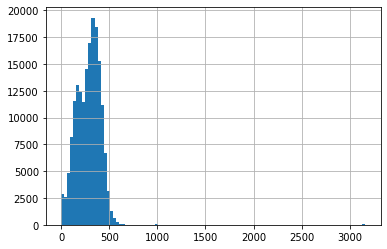

In [128]:
transformed_sqrt['odometer'].hist(bins = 100)

<AxesSubplot:>

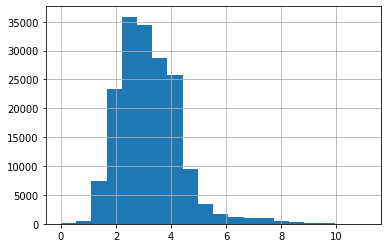

In [129]:
transformed_sqrt['car_age'].hist(bins = 20)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

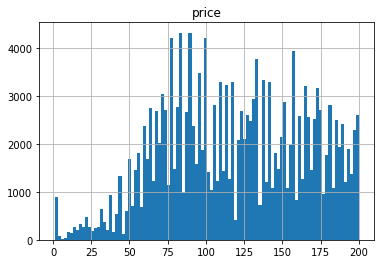

In [130]:
transformed_sqrtp.hist(bins = 100)

In [131]:
transformer_sqrtp = FunctionTransformer(sqrt_transform)
transformed_sqrtp = transformer_sqrtp.fit_transform(y_train[y_train['price'] < y_train['price'].quantile(.99)])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

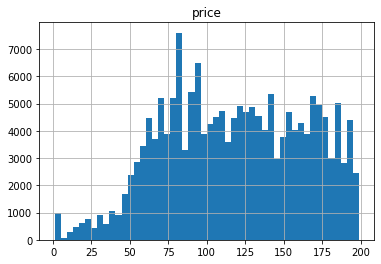

In [132]:
transformed_sqrtp.hist(bins=50) 

# Exponential Transformation

A close cousin of the log transform is the exponential transformation. There are many instances where you'd use an exponential transform:

- Anytime you apply a log transform to your target variable, you can apply an exponential transformation to revert it back to the original value. 
- Log and Exponential transformations are the inverse of each other. You can use either to perform the same task. Whether you want a log-linear or linear-log model. 
- Use Exponential transformations when you wanto magnify small differences.

231575     2.0
143933    16.0
4589       5.0
423573     3.0
153940     7.0
          ... 
231485     4.0
197990     6.0
256173    13.0
280797     7.0
235376     5.0
Name: car_age, Length: 174961, dtype: float64

In [137]:
def exp_transform(x):
    return np.exp(x)

transformer_exp = FunctionTransformer(exp_transform)

## In our dataset, car age may be something we want to magnify
transformed_exp = X_train.copy()

transformed_exp['car_age'] = transformer_exp.fit_transform(transformed_exp['car_age'])

(array([1.17198e+05, 4.84240e+04, 5.17400e+03, 1.68300e+03, 1.53500e+03,
        5.21000e+02, 1.96000e+02, 1.89000e+02, 3.80000e+01, 3.00000e+00]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

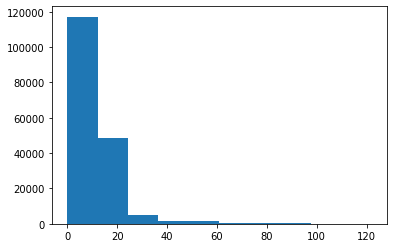

In [139]:
plt.hist(X_train['car_age'])

(array([1.74959e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.00000000e+00, 9.63666567e+51, 1.92733313e+52, 2.89099970e+52,
        3.85466627e+52, 4.81833284e+52, 5.78199940e+52, 6.74566597e+52,
        7.70933254e+52, 8.67299911e+52, 9.63666567e+52]),
 <BarContainer object of 10 artists>)

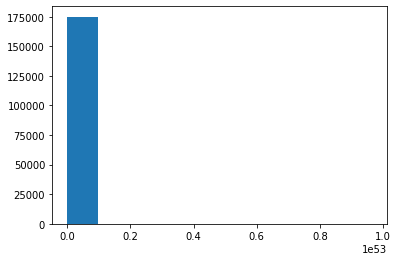

In [141]:
## X and y-scale here are much larger
plt.hist(transformed_exp['car_age'])

# Box-Cox Transformation

The Box-Cox transformation is a transformation that helps your dataset follow a normal distribution. Typically, we use Box-Cox transformation when our dataset is not normal, but close to being normal. When we want to either run tests or generate significance from our dataset, Box-Cox transformation is a good option to transform our target variable so it resembles a normal distribution.

Box-Cox aggregates multiple power transformers into a single transformer. You use lambda to adjust the transformation. Lambda varies from -5 to 5. If we set lambda equal to zero, it becomes simply a log transformation. If lambda is not equal to zero, 

In [ ]:
## Redo the pipeline for this example
from sklearn.model_selection import train_test_split

## Clip Outliers
df_example = df_example[df_example['price'] < np.percentile(df_example['price'], 95)]

## Remove prices that are 0 to make notebook work
df_example = df_example[df_example['price'] > 0].copy()

X = df_example.drop('price',axis =1 )
y = df_example[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([21773., 33555., 22686., 19194., 17693., 12706., 14398., 12613.,
        10854.,  9489.]),
 array([1.00000e+00, 4.00060e+03, 8.00020e+03, 1.19998e+04, 1.59994e+04,
        1.99990e+04, 2.39986e+04, 2.79982e+04, 3.19978e+04, 3.59974e+04,
        3.99970e+04]),
 <BarContainer object of 10 artists>)

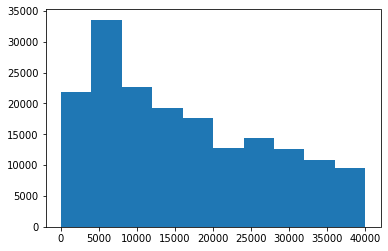

In [99]:
plt.hist(y_train['price'])

Then, we'll apply a boxcox transformation to make this dataset a bit more normal. Within scipy.stats, we can set `lmbda = None` and the boxcox function will find the lambda value that will maximize the log-likelihood function of the dataset:

(array([ 2055.,  3032.,  8883., 20664., 28066., 22105., 23630., 20965.,
        25400., 20161.]),
 array([  0.        ,  30.60222768,  61.20445537,  91.80668305,
        122.40891074, 153.01113842, 183.6133661 , 214.21559379,
        244.81782147, 275.42004915, 306.02227684]),
 <BarContainer object of 10 artists>)

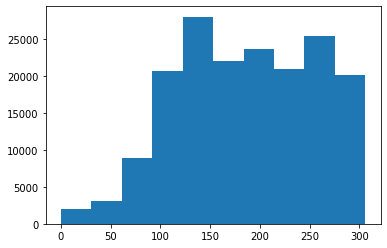

In [116]:
from scipy.stats import boxcox

boxcox_y_train = boxcox(y_train['price'], lmbda = None)

plt.hist(boxcox_y_train[0])

In [118]:
print("Lambda Parameter {0}".format(boxcox_y_train[1]))

Lambda Parameter 0.4694318552502363


# Feature Interactions

Like a chef remixing their ingredients, as a data scientist, we have a ton of different ways we can engineer features with our variables. Here are a few common methods:

- Arethmetic Interaction (addition, subtraction, division, or multiplication of variables)
- Binning (grouping variables in ranges)
- Creative Features (alternative metrics for evaluation)